## Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

## Model

In [2]:
class Fashion:
    def __init__(self, test_size=0.2):
        self.test_size = test_size
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
    def load_data(self):
        # load data using tensoflow library
        (X, y), _ = fashion_mnist.load_data()
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X,
                                                                                y,
                                                                                test_size=self.test_size,
                                                                                random_state=42)
        
    def transform_data(self):
        # normalise data
        self.X_train = self.X_train / 255.0
        self.X_test = self.X_test / 255.0
        
        # reshape data to have a depth of 1
        self.X_train = self.X_train.reshape(self.X_train.shape[0], 28, 28, 1)
        self.X_test = self.X_test.reshape(self.X_test.shape[0], 28, 28, 1)
        
        # convert y to categorical
        self.y_train = to_categorical(self.y_train, num_classes=10)
        self.y_test = to_categorical(self.y_test, num_classes=10)
    
    def get_data(self):
        # call the data splits
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def build_model(self):
        # create a CNN model
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
        model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(10, activation='softmax'))

        # compile the model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

In [4]:
# instatiate the class and 
fm = Fashion()

# call functions
fm.load_data()
fm.transform_data()
X_train, X_test, y_train, y_test = fm.get_data()
model = fm.build_model()

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.2, verbose=1);

2023-01-22 16:31:39.826377: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-22 16:31:39.947649: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
1200/1200 [==============================] - 29s 24ms/step - loss: 0.4385 - accuracy: 0.8426 - val_loss: 0.3212 - val_accuracy: 0.8820
Epoch 2/2
1200/1200 [==============================] - 30s 25ms/step - loss: 0.2772 - accuracy: 0.8996 - val_loss: 0.2785 - val_accuracy: 0.8995


In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

375/375 [==============================] - 2s 6ms/step - loss: 0.2845 - accuracy: 0.8992
Test accuracy: 0.8991666436195374


The test above indicates that the CNN model is able to predict with **~90% accuracy** pieces of clothes among 10 different categories. However, other classification metrics such as precision and recall are available depending on the business objective. 

## Overall Analysis

In [7]:
# summary per classification metric
labels = ['T-shirt/Top', 'Trouser', 'Pullover',
          'Dress', 'Coat', 'Sandal', 'Shirt', 
          'Sneaker', 'Bag', 'Ankle Boot']

In [8]:
# Make predictions on test set
y_pred = model.predict(X_test)

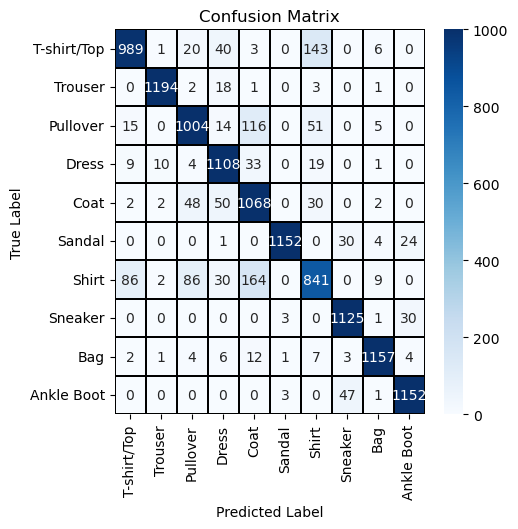

In [9]:
# plot confusion matrix
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mtx,
            annot=True,
            vmin=0, 
            vmax=1000,
            linewidths=0.1, 
            cmap='Blues', 
            linecolor='black', 
            fmt='.0f',
            xticklabels=labels,
            yticklabels=labels,
            ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.yticks(rotation=0)
plt.show();

The Confusion Matrix above shows that the model predict correct **98.9%** of all `Trouser` images. However, the model was not so successful in predicting `Shirt`, achieving **84.1%** accuracy.

One possible explanation to such a high accuracy is that trousers have a unique shape, whereas shirts have similar shapes to T-shirt/Top and Coat. This is interesting because it could explain the high numbers of misclassified images.

To improve the model, we could acquire mode shirt data and fine tune the model parameters. Also, to improve the reproducibility of the model, we must ensure the `random_state` is in place.